In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

import nltk
from nltk.corpus import stopwords

from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

data = pd.read_csv('cleaned reviews.csv')

In [3]:
data.head()

,Unnamed: 0.1,Unnamed: 0,reviews,stars,date,country,verified,corpus
0,0,0,✅ Trip Verified | Check in and security cleara...,5.0,2023-09-18,United Kingdom,True,check security clearance quick lhr wife used g...
1,1,1,Not Verified | British Airways has confirmed ...,6.0,2023-09-16,United Kingdom,False,verified british airway confirmed worst airlin...
2,2,2,✅ Trip Verified | Worst BA experience. I was s...,1.0,2023-09-15,South Africa,True,worst ba experience supposed fly italy septemb...
3,3,3,✅ Trip Verified | My daughter and I were deni...,2.0,2023-09-13,Canada,True,daughter denied boarding business class flight...
4,4,4,✅ Trip Verified | Despite boarding being the u...,1.0,2023-09-11,United Kingdom,True,despite boarding usual free lhr group called b...


In [4]:
#Average star ratings
data.stars.mean()

4.685174585002862

In [5]:
#Total reviews collected
data.reviews.count()

3494

In [6]:
#number of countries from each review
unique_countries = np.unique(data.country)

count_unique_countries = len(unique_countries)

print(count_unique_countries)

68


Text(0.5, 0.98, 'Counts for each ratings')

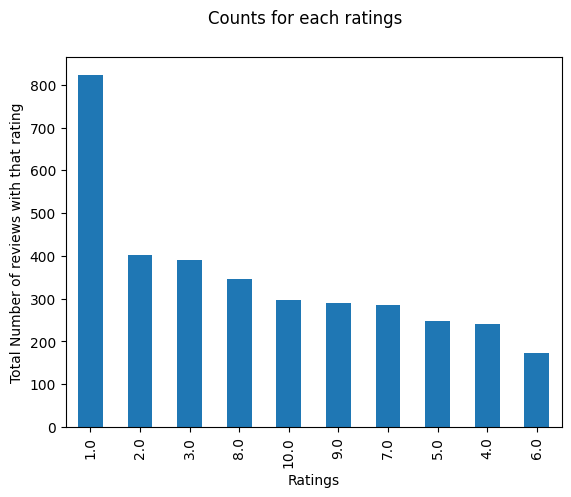

In [7]:
#measure the frequency of each rating
data.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [8]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'reviews', 'stars', 'date', 'country',
       'verified', 'corpus'],
      dtype='object')

In [9]:
# Calculate counts and percentages
value_counts = data['stars'].value_counts().reset_index()
value_counts.columns = ['Stars', 'total_counts']
total_ratings = len(data)
value_counts['pct_values'] = (value_counts['total_counts'] / total_ratings * 100).round(2)

# Sort the DataFrame by 'Stars' column
value_counts = value_counts.sort_values(by='Stars')

# Print the updated DataFrame
print(value_counts)

   Stars  total_counts  pct_values
0    1.0           823       23.55
1    2.0           403       11.53
2    3.0           390       11.16
8    4.0           240        6.87
7    5.0           248        7.10
9    6.0           173        4.95
6    7.0           286        8.19
3    8.0           345        9.87
5    9.0           289        8.27
4   10.0           297        8.50


Text(0.5, 1.0, 'Counts for each ratings')

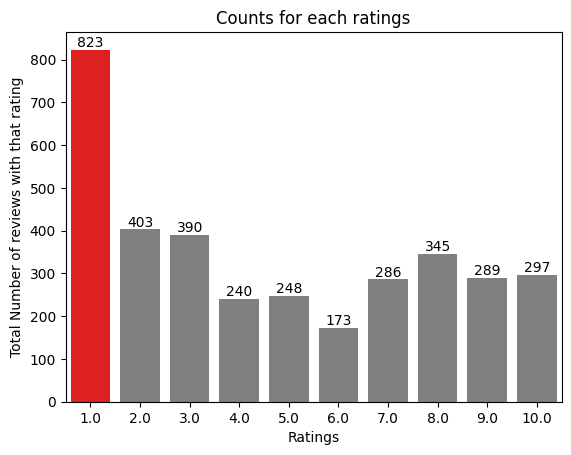

In [10]:
clrs = ['Red' if (x ==  max(value_counts.total_counts)) else 'grey' for x in value_counts.total_counts ]
ax = sns.barplot(x=value_counts.Stars, y=value_counts.total_counts, data=value_counts, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

In [11]:
#frequency of ratings from each country ranked

In [12]:
data_country_review = pd.DataFrame(data.country.value_counts().head()).reset_index()

In [13]:
data_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)

In [14]:
print(data_country_review)

    total_reviews  count
0  United Kingdom   2189
1   United States    391
2       Australia    145
3          Canada    109
4         Germany     62


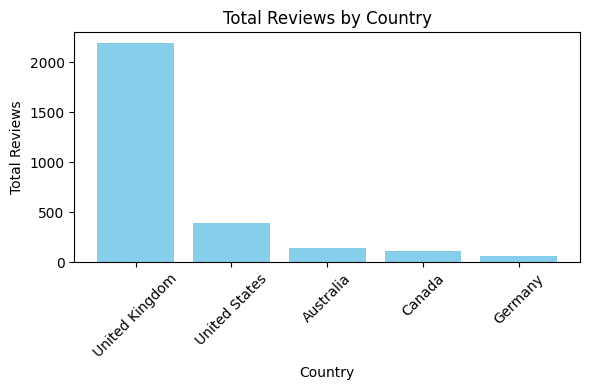

In [15]:
plt.figure(figsize=(6, 4))
plt.bar(data_country_review['total_reviews'], data_country_review['count'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Reviews')
plt.title('Total Reviews by Country')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

In [16]:
data_country_rating = pd.DataFrame(data.groupby('country')['stars'].mean().sort_values(ascending=False)).reset_index()

In [17]:
data_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)

In [18]:
print(data_country_rating)

                  country  avg_rating
0                   Chile        10.0
1                  Panama        10.0
2          Cayman Islands         9.0
3                 Bahrain         9.0
4   Saint Kitts and Nevis         9.0
..                    ...         ...
63                Nigeria         2.0
64                  Egypt         2.0
65     Russian Federation         1.5
66                Hungary         1.0
67                   Laos         1.0

[68 rows x 2 columns]


Text(0.5, 1.0, 'Top 10 countries ranked according to average ratings given to BA')

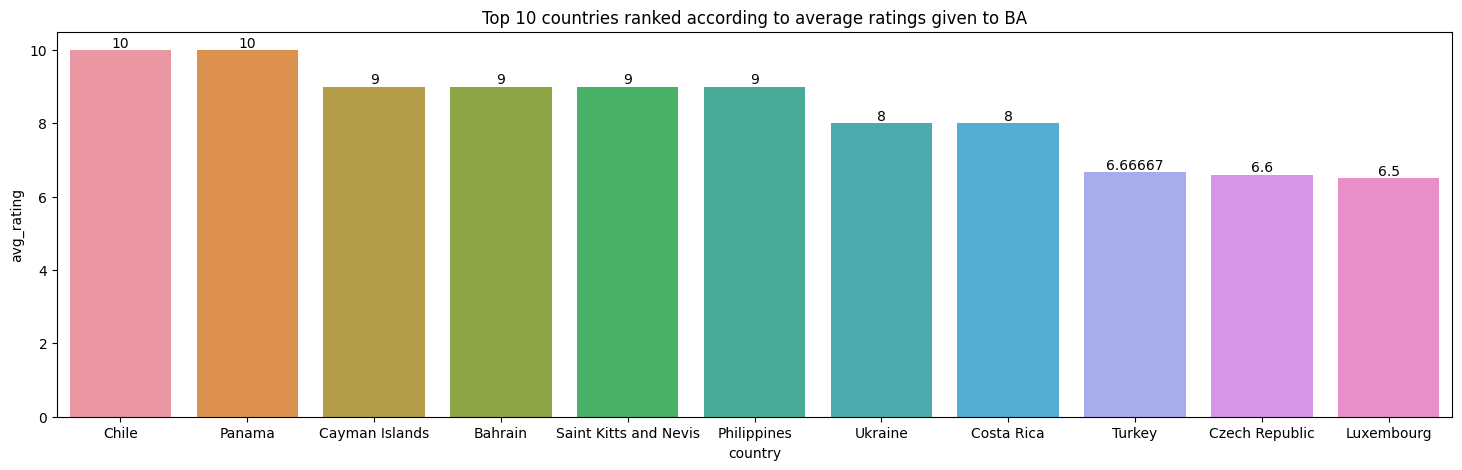

In [19]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=data_country_rating[:11])
ax.bar_label(ax.containers[0])
ax.set_title("Top 10 countries ranked according to average ratings given to BA")

In [20]:
#Time Series Analysis

In [21]:
data.date = pd.to_datetime(data.date)

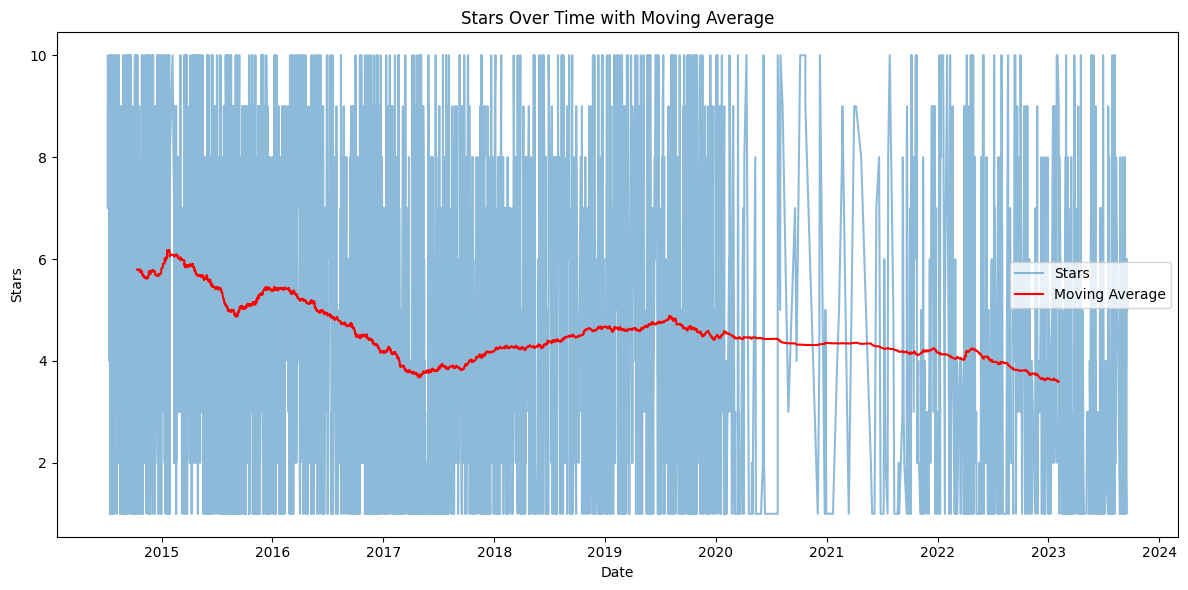

In [22]:

# Sample code to create a DataFrame for testing purposes (replace with your actual data)
# data = pd.DataFrame({'date': your_date_data, 'stars': your_stars_data})

x = data['date']
y = data['stars']

# Calculate the moving average
window_size = 365
moving_average = y.rolling(window=window_size, center=True).mean()

# Create a figure and axis with a larger figsize
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the original data
ax.plot(x, y, label='Stars', alpha=0.5)  # alpha for transparency

# Plot the moving average
ax.plot(x, moving_average, label='Moving Average', color='red')

# Add labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Stars')
ax.set_title('Stars Over Time with Moving Average')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [23]:
"""According to the moving average we do see a strong decreasing trend from mid 2019 to 2022,
this was caused by covid pandemic. However the ratings have been quite weak and seeing some of
the reviews were not verified and considering the nature of them not being verified where they
did not even get a chance to board BA due to various issues we see a similarity in the complaints
which is service."""

'According to the moving average we do see a strong decreasing trend from mid 2019 to 2022,\nthis was caused by covid pandemic. However the ratings have been quite weak and seeing some of\nthe reviews were not verified and considering the nature of them not being verified where they\ndid not even get a chance to board BA due to various issues we see a similarity in the complaints\nwhich is service.'

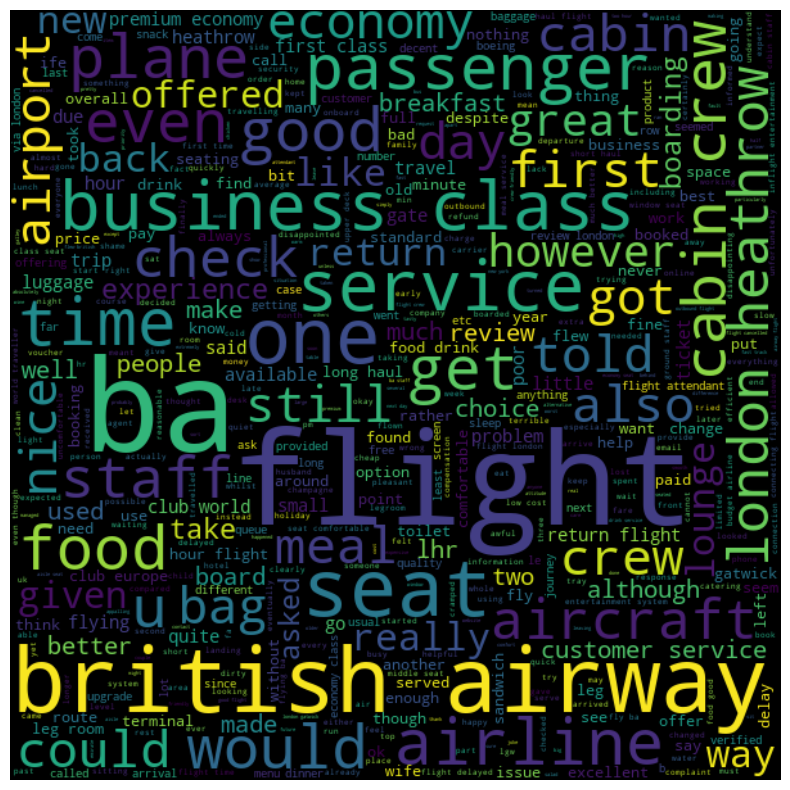

In [24]:
# Start with one review:
reviews = " ".join(data.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [25]:
"""We see a lot of words and there are a few that dont give us the right perspective of the service being either positive or negative.
We will use NLTK to remove them, words such as 'ba', 'heathrow', 'aircraft' to name a few."""

"We see a lot of words and there are a few that dont give us the right perspective of the service being either positive or negative.\nWe will use NLTK to remove them, words such as 'ba', 'heathrow', 'aircraft' to name a few."

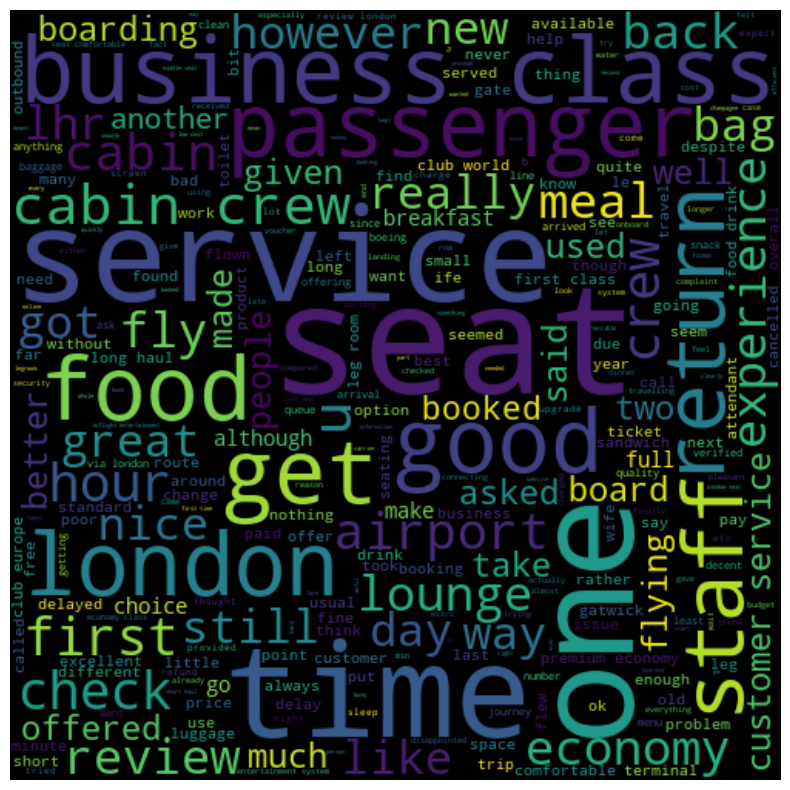

In [29]:
reviews = " ".join(data.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [30]:
#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'time'),
  Text(3, 0, 'food'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'good'),
  Text(6, 0, 'cabin'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'return'),
  Text(16, 0, 'lounge'),
  Text(17, 0, 'club'),
  Text(18, 0, 'boarding'),
  Text(19, 0, 'customer')])

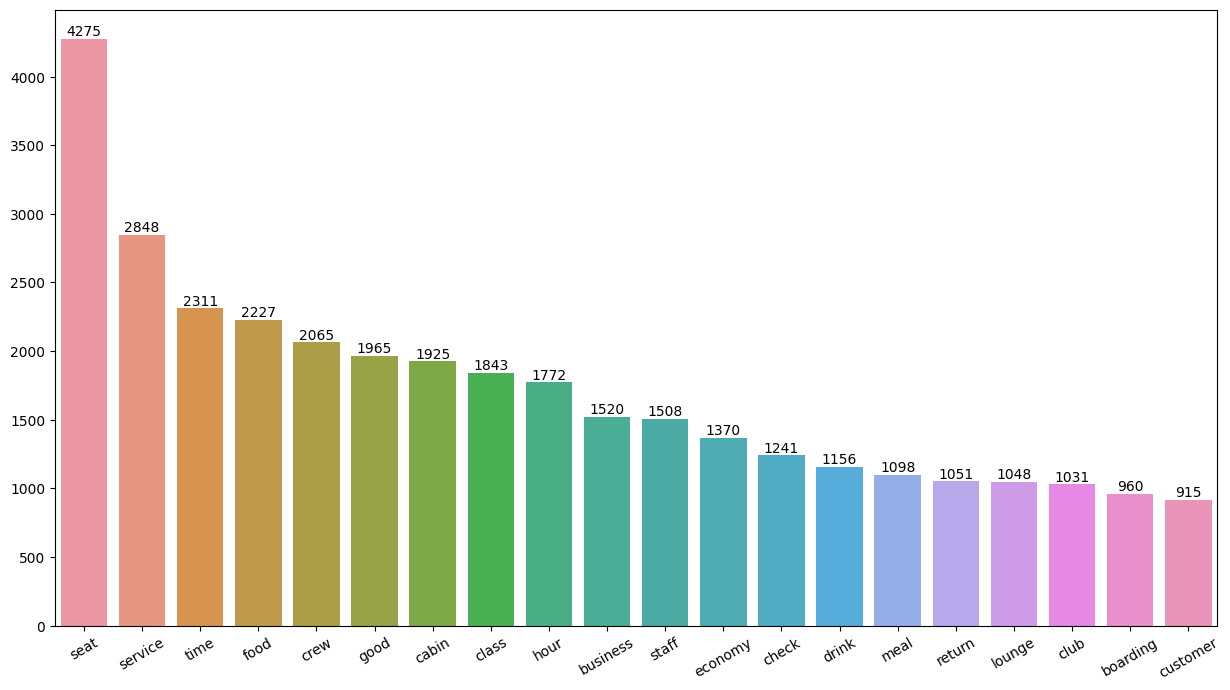

In [31]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

In [ ]:
"""Seat has been used the most so we need to understand what is being said around this word followed by
service and time. These words all go with what BA provides for customer experience."""

<Axes: >

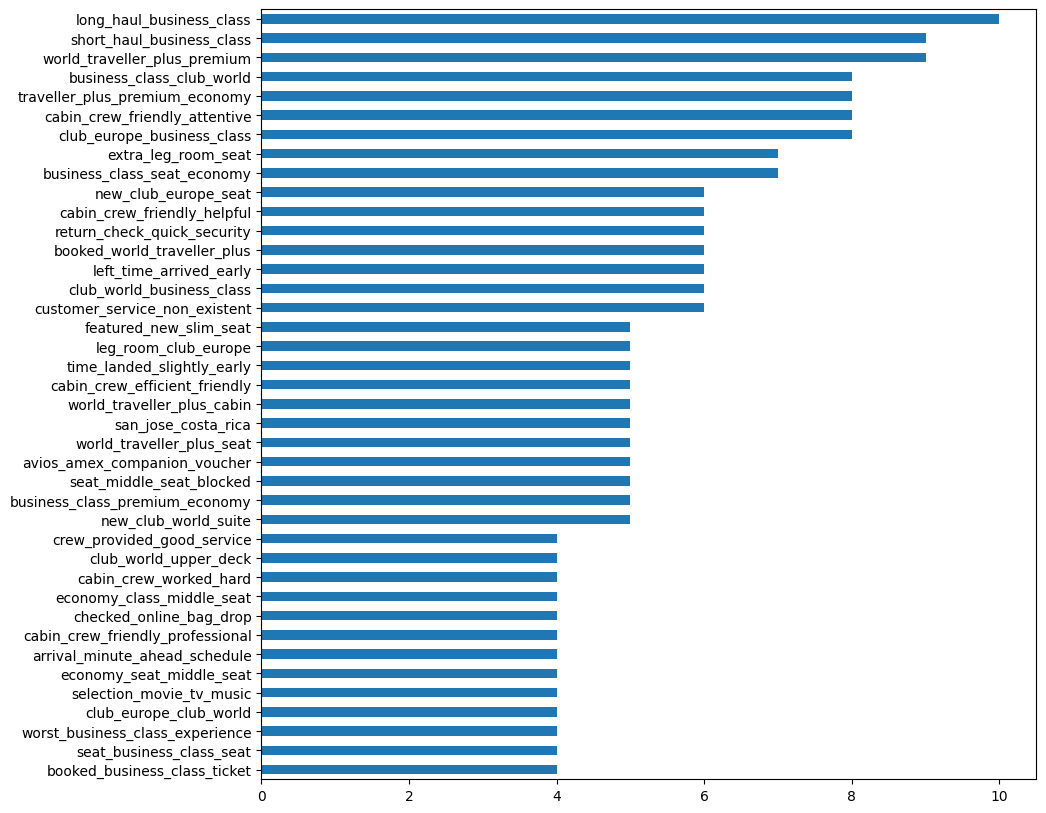

In [32]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(data.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

In [ ]:
"""As seen on the N-gram results we can see some positive words and negative. Customers are giving
good feedback in some areas like the experience in 'Business_class' or 'friendly_cabin_crew'. We need to
rank the rating accoring to "Bad" = 1 to 3, "average" =4 to 6 and "good" = 7 to 10 and gain a good
view of things"""

In [33]:
ratings_1_3 = data[data.stars.isin([1,2,3])]
ratings_4_6 = data[data.stars.isin([4,5,6])]
ratings_7_10 = data[data.stars.isin([7,8,9,10])]

<Axes: >

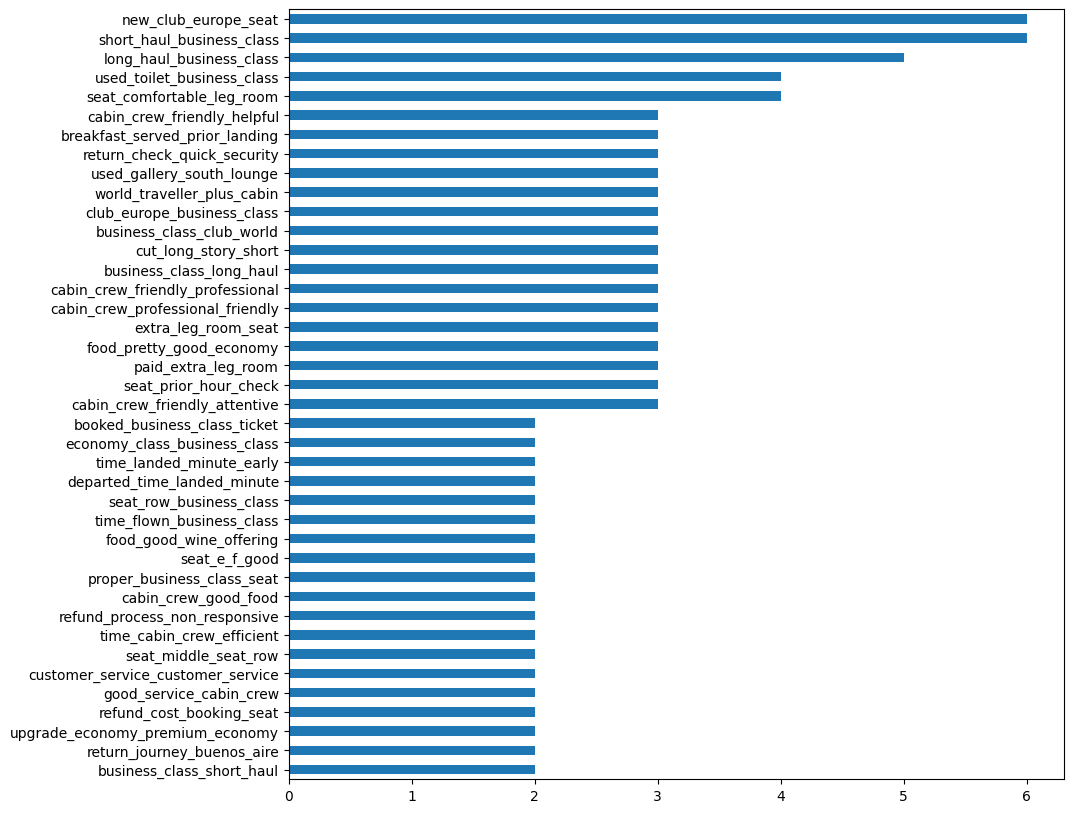

In [34]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<Axes: >

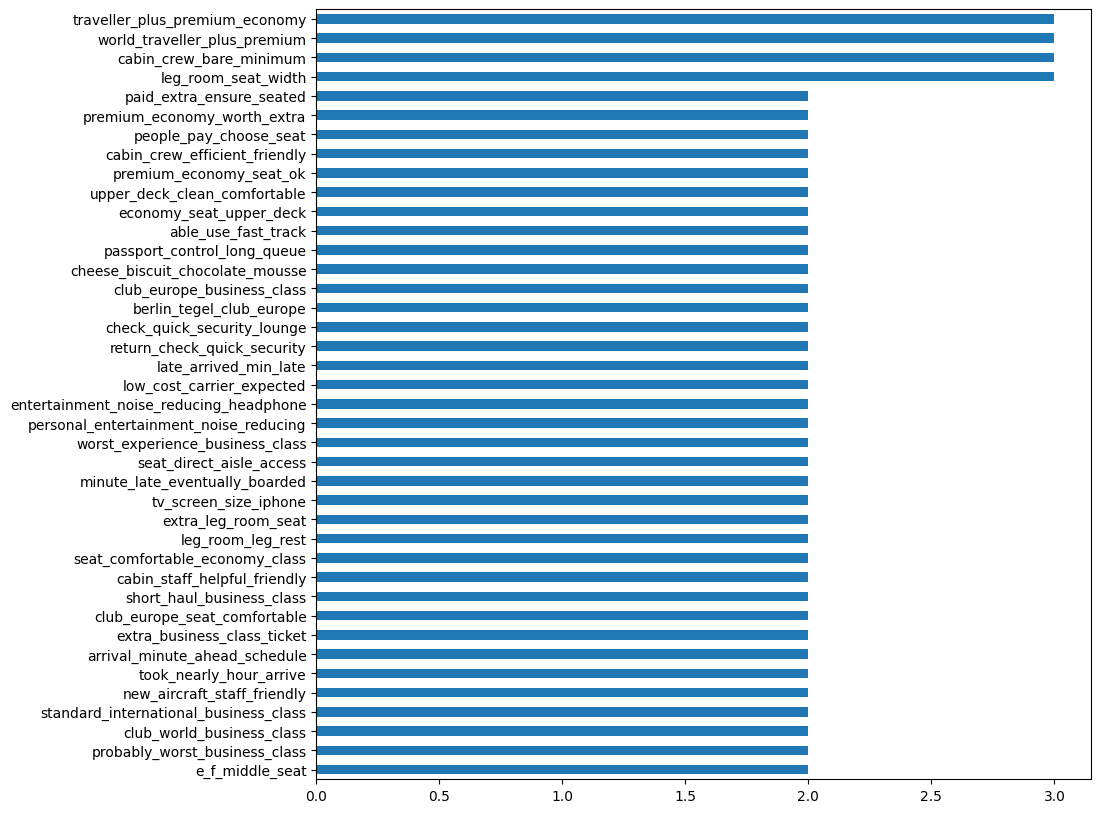

In [35]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

In [ ]:
"""Use textblob to define if the text is positive or negative"""

In [36]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

#set a column Polarity with all 0 values initially
data['polarity'] = 0

for i in range(len(data.corpus)):
    sent= TextBlob(data.corpus[i])
    polarity  = sent.sentiment.polarity
    subjectivity  = sent.sentiment.subjectivity
    data['polarity'][i] = polarity

C:\Users\Sinamandla Mabaso\AppData\Local\Temp\ipykernel_9948\3820133693.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['polarity'][i] = polarity


In [37]:
#see how many texts are with positive comments

print(f"{data[(data['polarity'] >-0.2) & (data['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")

print(f"{data[(data['polarity'] >-0.1) & (data['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")


2361 number of reviews between -0.2 and 0.2 polarity score
1376 number of reviews between -0.1 and 0.1 polarity score


In [ ]:
"""Polarity score is given between -1 to 1 and more close the value to -1, it indicates negative review and vice versa is true for positive value.
If we consider a threshold where any review with polarity greater than 0.2 is positive and less than -0.2 is negative, we are left with 2286 reviews that lies in the neutral zone.
To further narrow down this number of neutral reviews, let's take the threshold of 0.1.

We will try another method of labelling the reveiws as positives or negatives. In this we will use VADER algorihtm by nltk library."""

In [38]:
#Another way to get sentiment
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
vds = SentimentIntensityAnalyzer()
# text = 'This is an extremely entertaining movie'

#set a column Polarity with all 0 values initially
data['label'] = 0
    
for i in range(len(data.corpus)):
    
    score = vds.polarity_scores(data.corpus[i])['compound']
    #print(score)
    if score > 0.2:
        data.loc[i, 'label'] = 1
        #print("1st")
    elif score < 0:
        data.loc[i, 'label'] = -1
        #print("2nd")
    else:
        data.loc[i, 'label'] = 0

In [39]:
data.label.value_counts()

label
 1    2231
-1    1141
 0     122
Name: count, dtype: int64

In [ ]:
"""We have already cleaned our reviews, however, for topic modeling we will also require word embeddings or (words matrix). 
For this purpose we will use count vectorizer method from sklearn library"""

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

#create an object of count vectorizer
vect = CountVectorizer()

#apply transformation
tf = vect.fit_transform(data.corpus).toarray()
tf_feature_names = vect.get_feature_names_out()

In [42]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [43]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights
0,flight,627.7,plane,25.5,seat,990.5,flight,2456.4,flight,560.8,flight,1807.4,seat,1536.1,flight,61.3
1,time,304.6,ba,22.5,class,911.4,ba,1111.9,boarding,533.4,seat,1088.2,ba,1424.8,plane,51.0
2,good,293.6,board,13.9,flight,876.2,hour,869.7,check,528.0,good,1082.6,flight,1066.8,drink,47.4
3,crew,229.9,back,13.2,ba,852.4,london,587.1,seat,453.0,crew,856.1,airline,845.1,hour,39.0
4,service,229.8,london,12.9,food,811.2,airway,585.0,lounge,399.0,ba,768.9,british,716.4,water,33.8
5,food,190.8,low,12.9,business,651.7,british,578.4,bag,395.0,food,731.4,airway,699.6,row,29.8
6,lounge,168.7,nice,12.2,cabin,637.6,day,563.4,ba,394.0,cabin,725.5,service,673.4,passenger,25.7
7,ba,162.9,product,11.9,service,622.7,told,553.9,staff,377.3,time,599.9,london,493.6,late,25.2
8,drink,160.7,review,11.9,crew,613.1,customer,541.2,passenger,288.9,london,581.5,business,383.7,time,24.7
9,nice,155.0,terminal,11.8,meal,598.5,would,504.8,time,283.0,service,569.3,class,377.3,staff,24.4


In [44]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)

array([[0.06940631, 0.07101844],
       [0.01421768, 0.00711695],
       [0.2114989 , 0.        ],
       ...,
       [0.11628915, 0.07359708],
       [0.00754907, 0.04639915],
       [0.06340372, 0.11173921]])

In [45]:
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)

In [46]:
df_topic

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights
0,flight,36.1,seat,17.2
1,ba,12.9,ba,8.9
2,hour,8.2,class,7.3
3,time,6.9,food,6.0
4,london,6.5,business,5.8
5,airway,6.0,service,5.7
6,service,6.0,cabin,5.6
7,british,6.0,good,5.3
8,would,5.4,crew,5.2
9,airline,4.6,economy,4.6
